In [1]:
from evwTools import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/gm2offline_ana_100files_fullTrees.root")
#f = r.TFile("./data/dataExternal/Oct16DataSet/gm2offline_ana_12396057_16369.00196.root")
f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_13084967_16358.00241.root") #v9_08 energy update
#f = r.TFile("./data/dataExternal/Nov7_v08_EnergyFix/results_full_v9_08_00_Nov7_EnergyFix.root")
#f = r.TFile("./data/gm2offline_ana_v11_Nov14.root")
#f = r.TFile("./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [3]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :    49765 : Total =        19551224 bytes  File  Size =    7224973 *
*        :          : Tree compression factor =   2.71                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    49765 : Total  Size=     200081 bytes  File Size  =       1765 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 113.08     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    49765 : Total  Size=     200114 bytes  File Size  =       1779 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 112.21     *
*...................................................

In [4]:
hi = r.TH1D("hi","Energies",4000,0,4000)
tcomp.Draw("energyWest>>hi","","goff")

49765

In [5]:
singlesList = []
singlesCounter = 0
breakpoint = 1000000

eventList = r.TEventList()

for i, entry in enumerate(tcomp):
    if singlesCounter > breakpoint:
        print("i > ", breakpoint,". Breaking.")
        break
    if(i % int(breakpoint/1) == 0):
        print("Entry:", i)
        print("    Singles found so far:", singlesCounter,"/", breakpoint, "(", singlesCounter / breakpoint *100, "% )")
    numberOfXtals = len(entry.crystalsWest)
    if numberOfXtals == 1 and entry.energyWest > 70:
        singlesCounter += 1
        #singlesList.append(i)
        eventList.Enter(i)

Entry: 0
    Singles found so far: 0 / 1000000 ( 0.0 % )


In [6]:
tcomp.SetEventList(eventList)
print(eventList.GetN())

5610


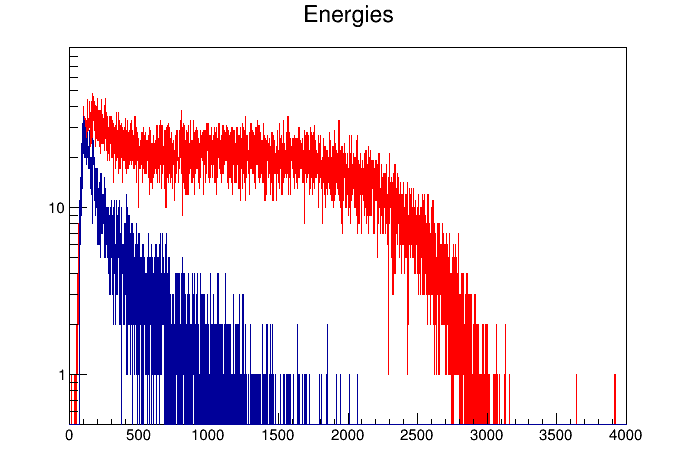

In [7]:
c = r.TCanvas()
hi.SetLineColor(2)
hi.Draw()
tcomp.Draw("energyWest","","same")
c.SetLogy()
c.Draw()

In [8]:
count = 0

xtals = []

tcomp.SetEventList(eventList)
tcomp.Draw("crystalsWest:caloNum:energyWest:energyEast")
for i in range(eventList.GetN()):
    xtals.append( (int(tcomp.GetV1()[i]), int(tcomp.GetV2()[i]), tcomp.GetV3()[i], tcomp.GetV4()[i] )   )

In [9]:
singleXtals, calos, eWest, eEast = zip(*xtals)

In [10]:
ding = []
for i in range(24):
    ding.append([])
    for j in range(54):
        ding[i].append([])

In [11]:
for i in range(len(singleXtals)):
    ding[calos[i]-1][int(singleXtals[i])-1].append( (eWest[i], eEast[i]) )

In [12]:
grVec = []

for i in range(24):
    for j in range(54):
        gr = r.TGraph()
        gr.SetTitle("Calo "+str(i+1)+" Xtal "+str(j))
        vec1 = ding[i][j]
        if(len(vec1) > 0):
            for k in range(len(vec1)):
                gr.SetPoint(k,vec1[k][1],vec1[k][0])
        grVec.append(gr.Clone("gr"+str(i*24+j)))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Info in <TCanvas::Print>: png file ./images/SingleHitCluster_Calo01.png has been created
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)
Error in <TGraphPainter::PaintGraph>:

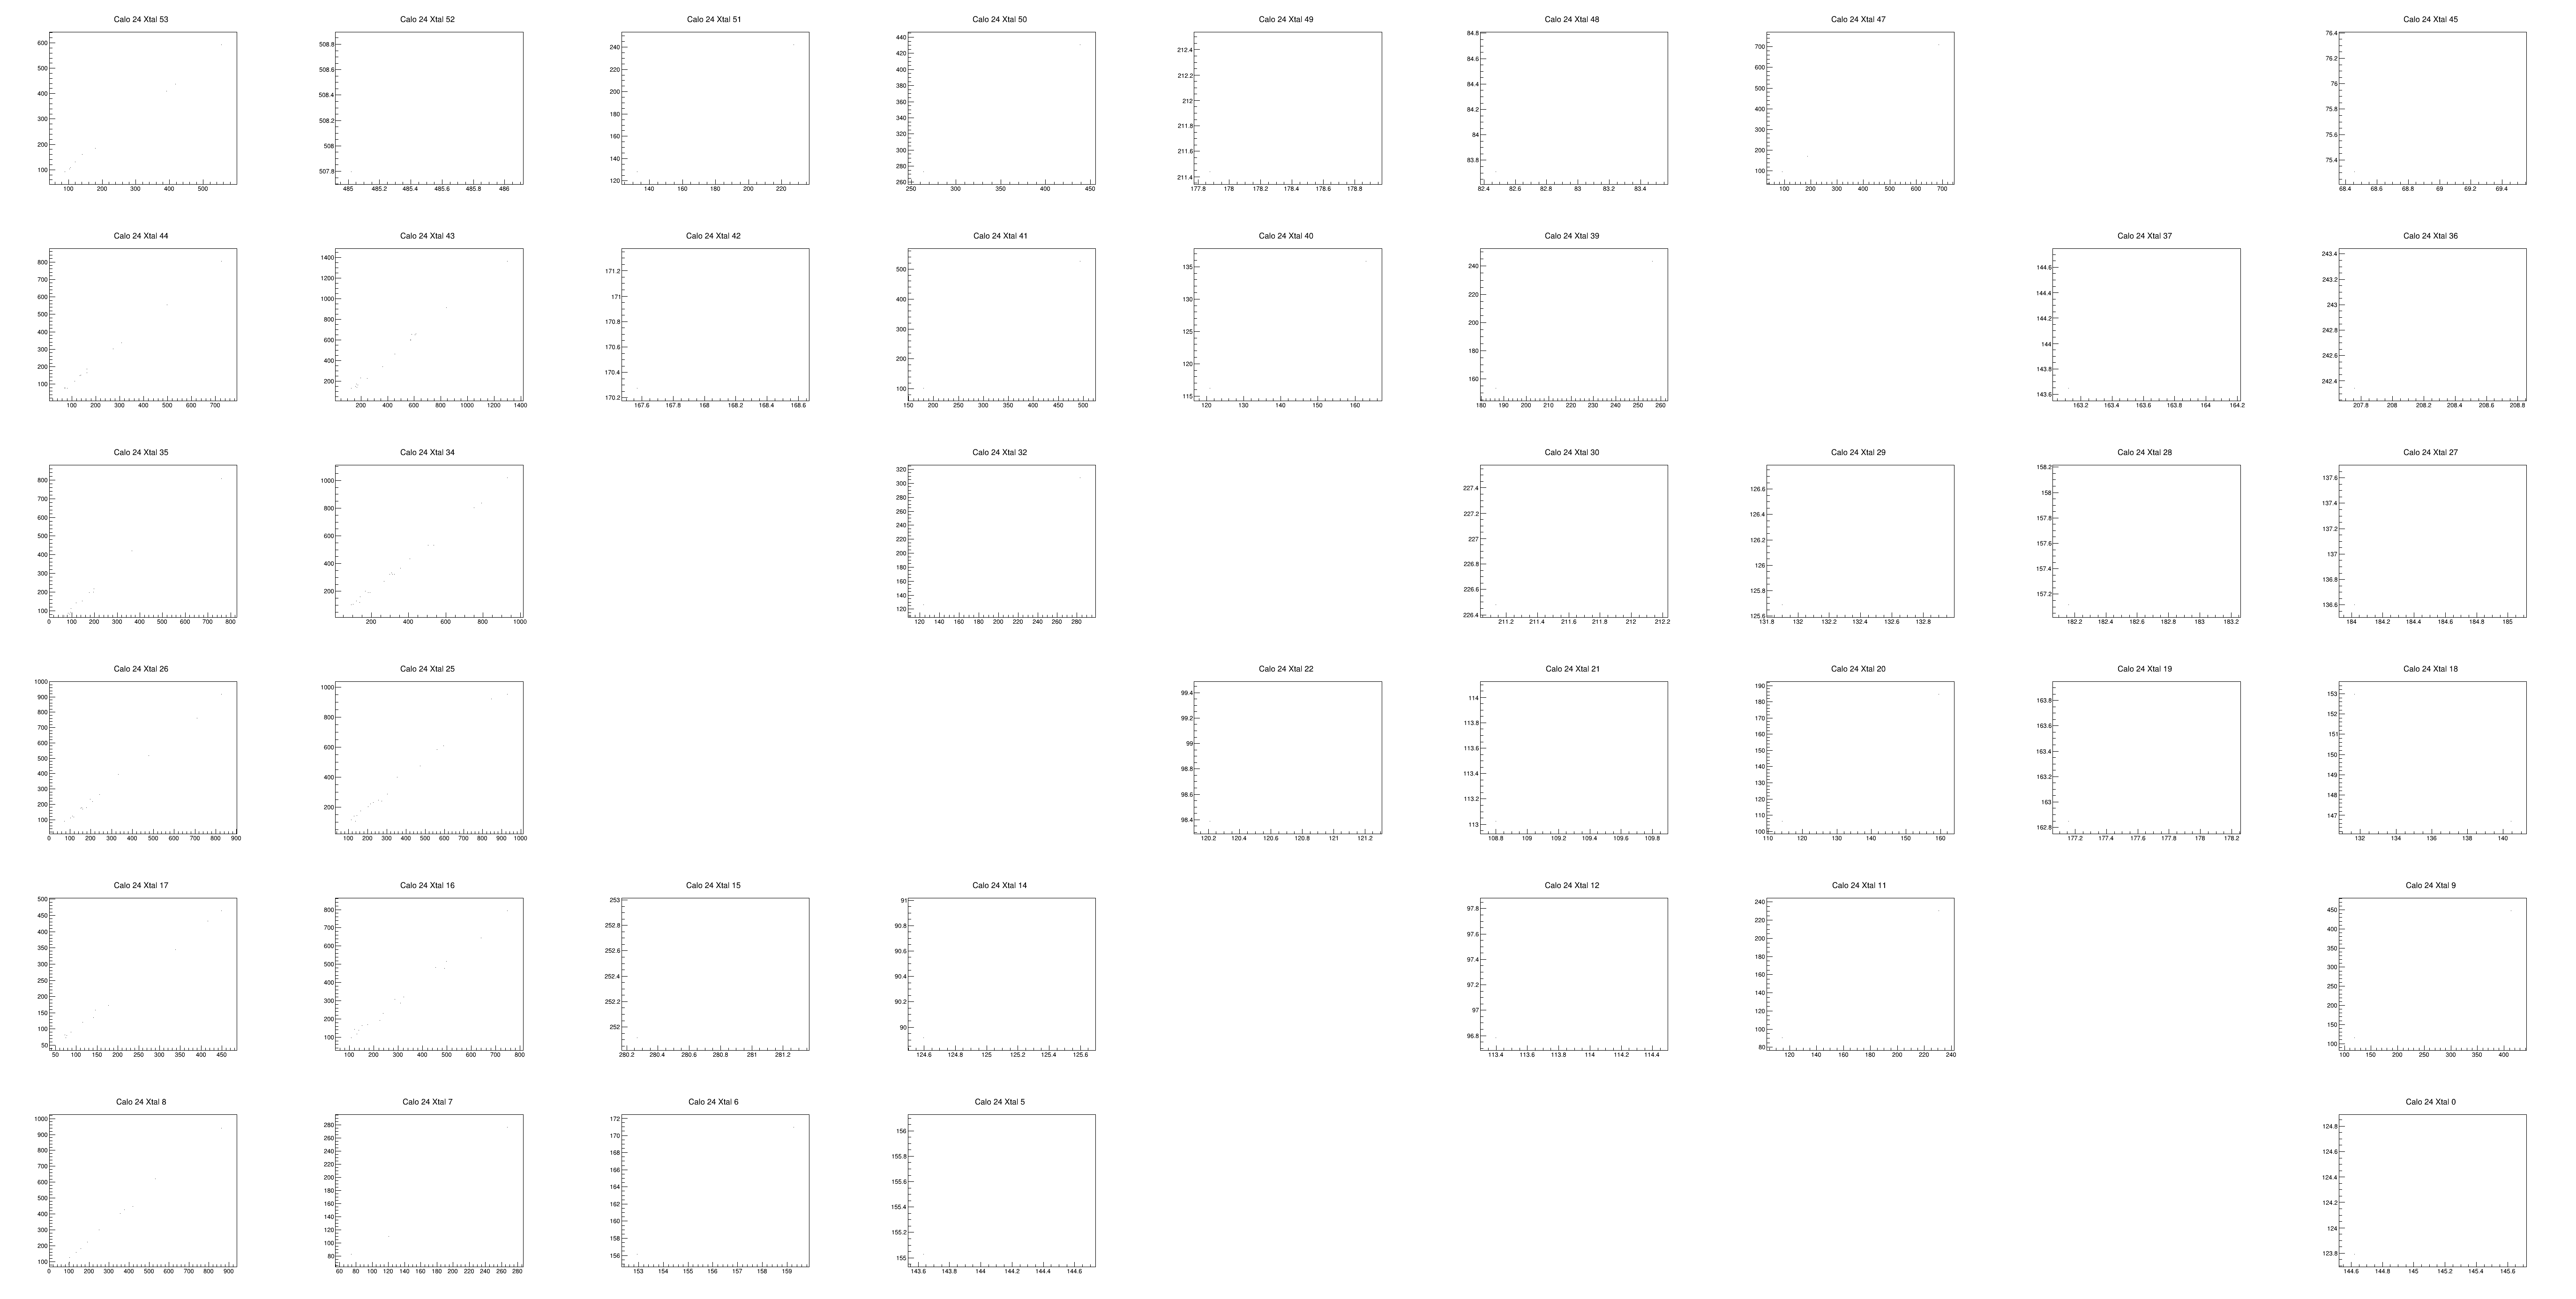

In [13]:
for i in range(24):
    c = r.TCanvas("c"+str(i+1),"c",5500,2800)
    c.Divide(9,6)
    for j in range(54):
        c.cd(j+1)
        if(len(vec1) > 0):
            grVec[i*54+(53-j)].Draw("ap")
    c.Print("./images/SingleHitCluster_Calo"+str(i+1).zfill(2)+".png")
    c.Draw()

In [14]:
slopes = []

for gr in grVec:
    func1 = r.TF1("func1","pol1",0,6000)
    func1.FixParameter(0,0)
    func1.SetParameter(1,0)
    gr.Fit("func1","REMQ")
    slopes.append(func1.GetParameter(1))

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
W

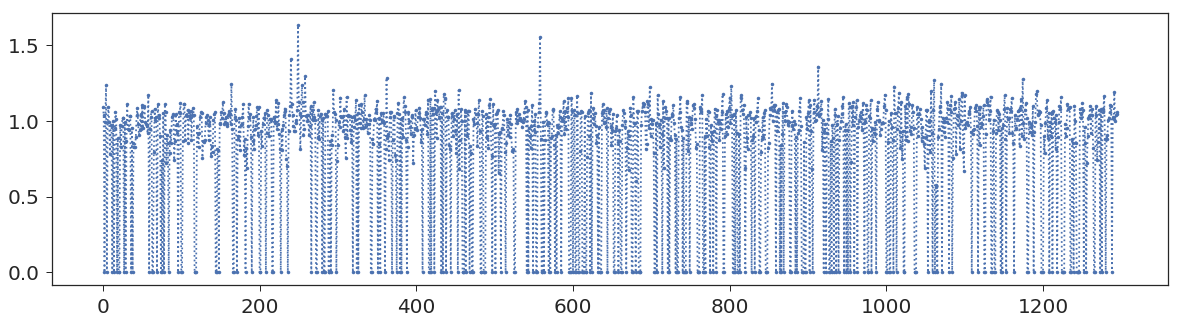

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(slopes,".:")
plt.show()

In [16]:
slopesByCalo = [[] for x in range(24)]

for i, slope in enumerate(slopes):
    slopesByCalo[i%24].append(slope)

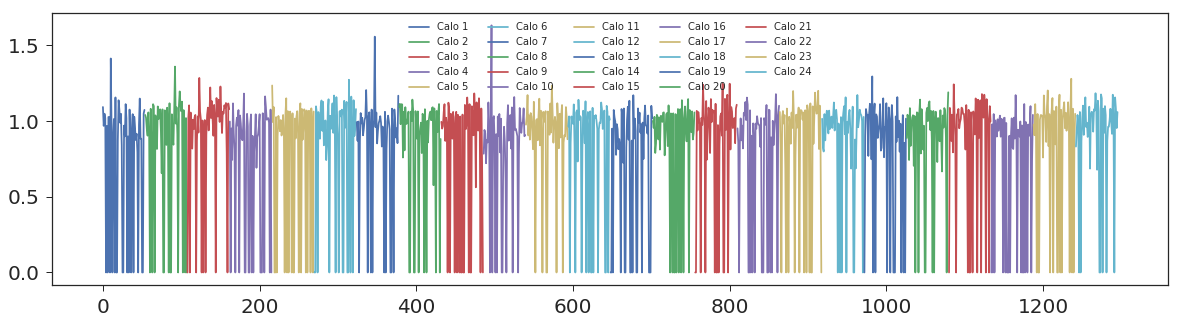

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
for i,slope in enumerate(slopesByCalo):
    plt.plot([x+i*54 for x in range(54)],slope,"-",label='Calo '+str(i+1))
plt.legend(ncol=5)
plt.show()

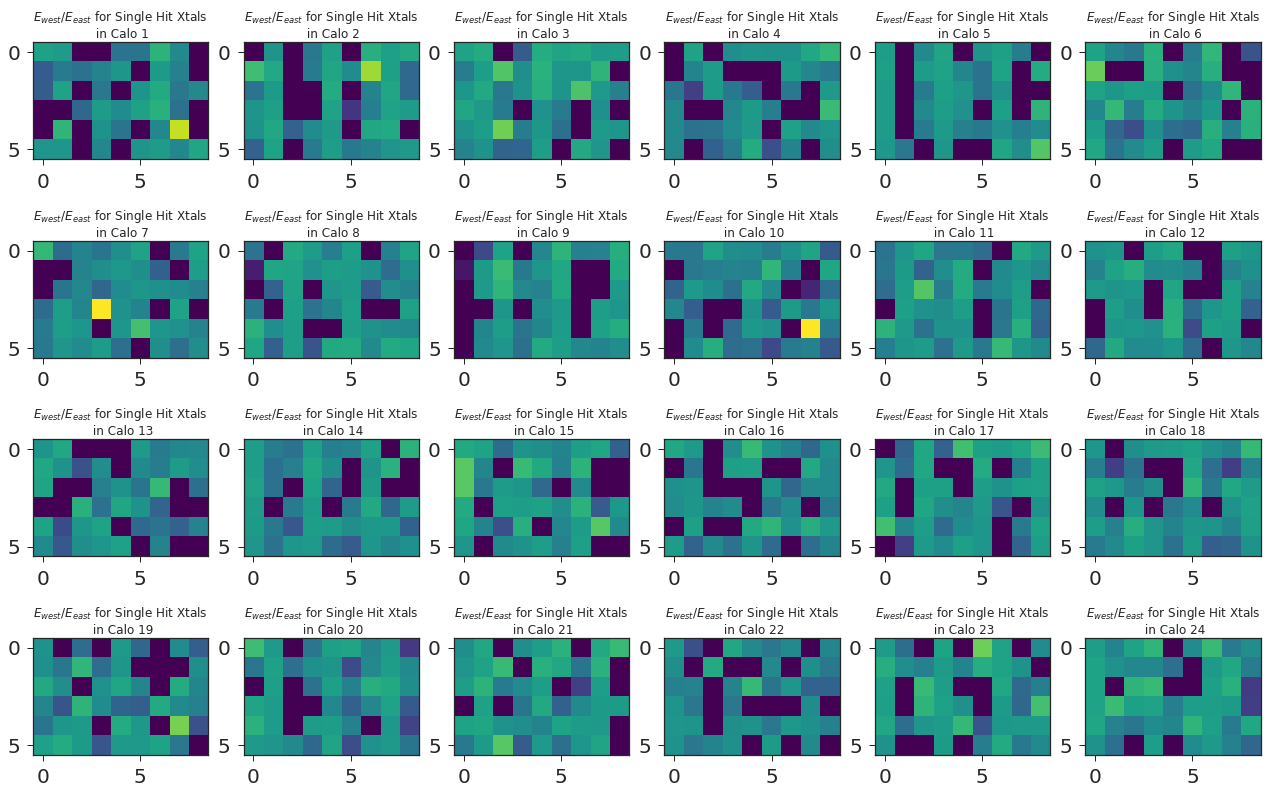

In [18]:
fig, ax = plt.subplots(4,6,figsize=(22,14))

for i, ax1 in enumerate(ax):
    for j, ax2 in enumerate(ax1):
        calo = i*6 + j
        ax2.imshow(arrangeXtals(slopesByCalo[calo]),vmin=0.5,vmax=1.5,cmap='viridis')
        ax2.set_title(r"$E_{west} / E_{east}$ for Single Hit Xtals"+"\n in Calo "+str(calo +1))
plt.show()

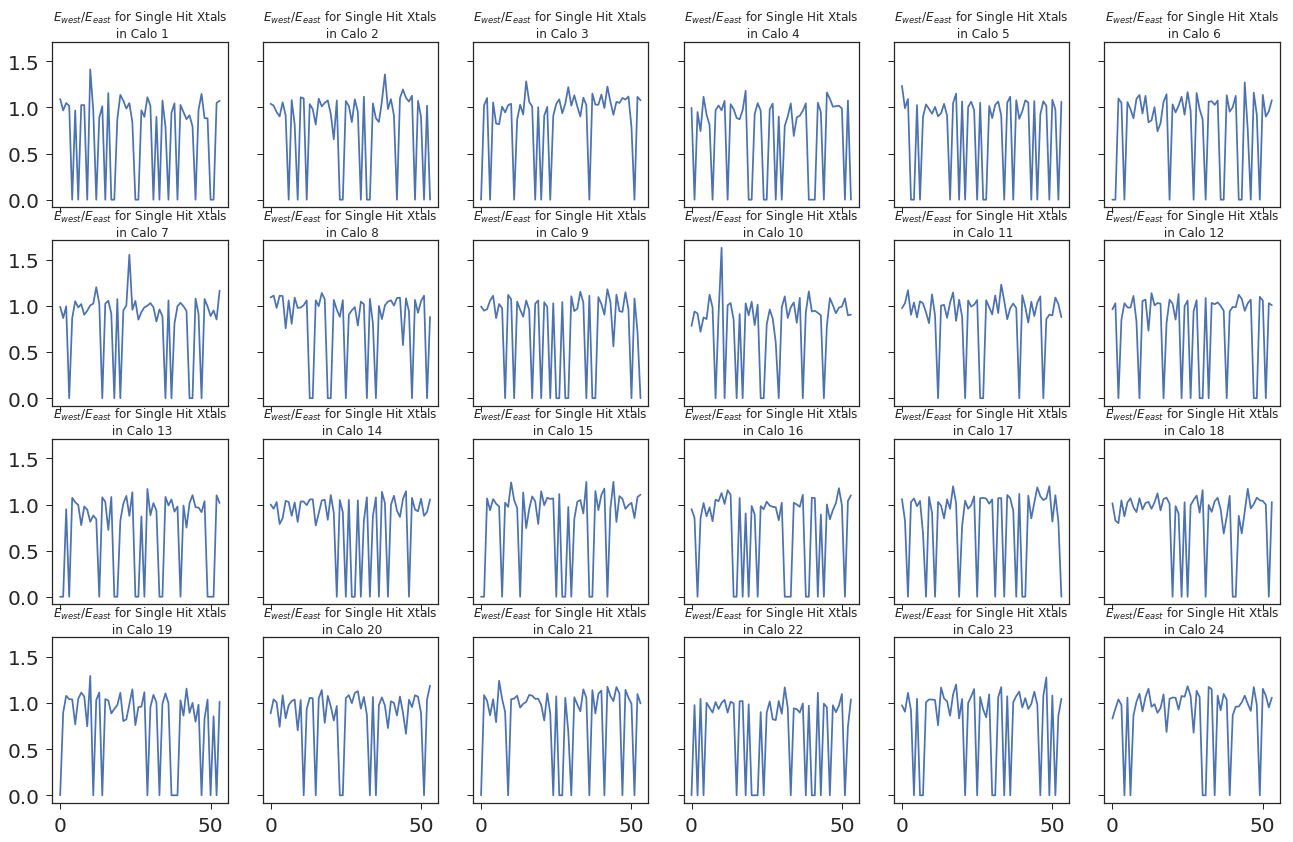

In [19]:
fig, ax = plt.subplots(4,6,figsize=(22,14),sharey=True,sharex=True)

for i, ax1 in enumerate(ax):
    for j, ax2 in enumerate(ax1):
        calo = i*6 + j
        ax2.plot(slopesByCalo[calo])
        ax2.set_title(r"$E_{west} / E_{east}$ for Single Hit Xtals"+"\n in Calo "+str(calo +1))
plt.show()

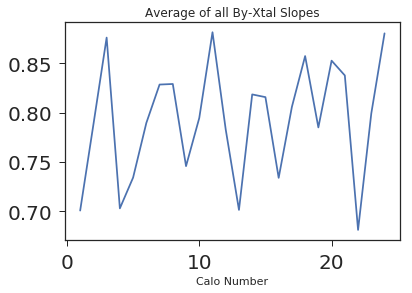

In [20]:
plt.plot([x for x in range(1,25)],[np.mean(calo) for calo in slopesByCalo])
plt.title("Average of all By-Xtal Slopes")
plt.xlabel("Calo Number")
plt.show()

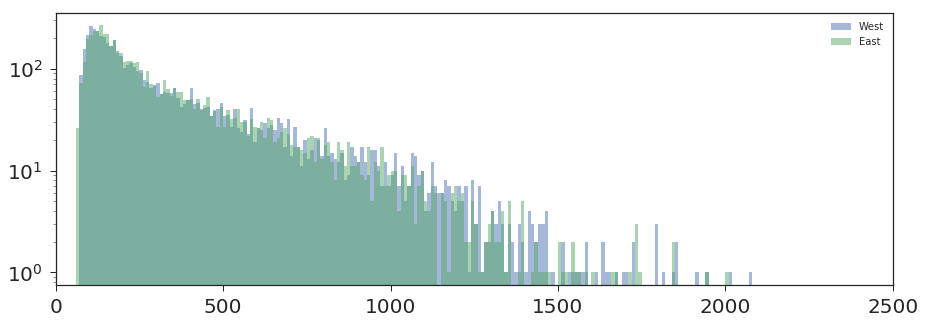

In [21]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(eWest,bins=400,range=(0,4000),label='West',alpha=0.5)
plt.hist(eEast,bins=400,range=(0,4000),label='East',alpha=0.5)
plt.yscale('log')
plt.xlim(0,2500)
plt.legend()
plt.show()

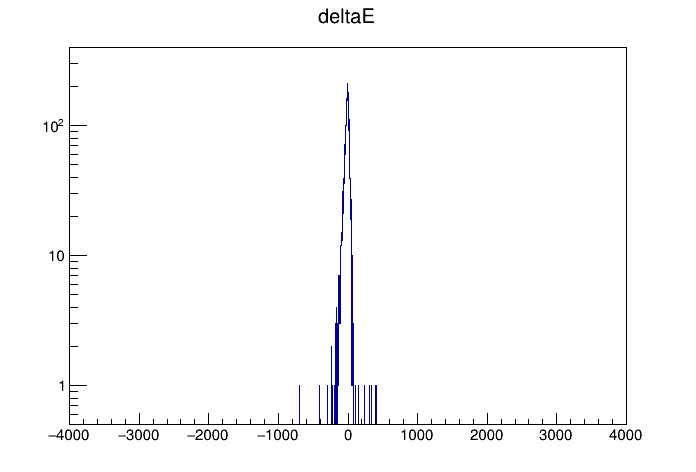

In [22]:
c = r.TCanvas()
tcomp.Draw("deltaE>>hist(4000,-4000,4000)","","")
c.SetLogy()
c.Draw()

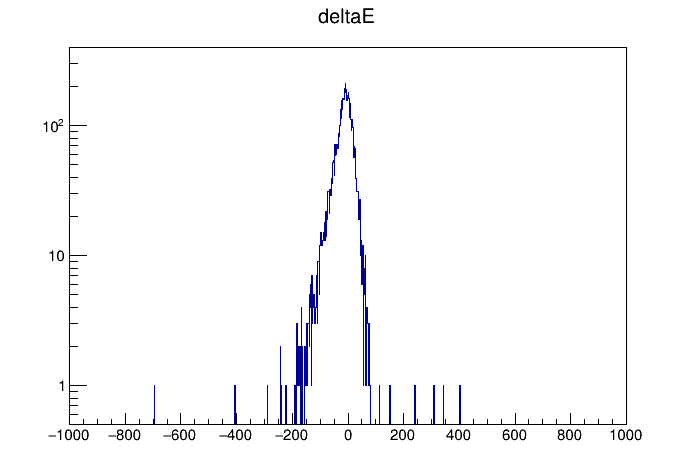

In [23]:
c = r.TCanvas()
tcomp.Draw("deltaE>>hist(1000,-1000,1000)","","")
c.SetLogy()
c.Draw()